In [1]:
from datasets import load_dataset
import aiohttp
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

/mnt/data-artemis/kshitij/TEMP/temp_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = load_dataset("librispeech_asr", 
                    cache_dir="/mnt/data-artemis/kshitij/TEMP/ls-cache", 
                    split="train.other.500",
                    trust_remote_code=True,
                    storage_options={'client_kwargs': {'timeout': aiohttp.ClientTimeout(total=7200)}}
                    )

In [3]:
filtered_data = {
                "file":[],
                "text":[],
                "speaker_id":[]
                }

filtered_data['file'] = data["file"]
filtered_data['text'] = data["text"]
filtered_data['speaker_id'] = data["speaker_id"]

train_data = pd.DataFrame.from_dict(filtered_data)

In [4]:
train_data

,file,text,speaker_id
0,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,THE ORDINARY DUTIES OF LIFE MISTER DALY ANXIOU...,8296
1,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,BUT ROSIE PUT HER ARMS ABOUT HER FATHER'S NECK...,8296
2,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,SO THEY SHALL MY DARLINGS SHE ANSWERED FOR MAM...,8296
3,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,AND PERHAPS HE WAS NOT SORRY BEING WEAK AND LA...,8296
4,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,ELSIE EXPECTED HER CHILDREN TO FIND IT A LITTL...,8296
...,...,...,...
148683,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,AFTER THAT SHE BOWED HER HEAD ON HER HANDS HER...,6758
148684,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,THE TRAVELLER STANDING BY THE STREAM SAW THE S...,6758
148685,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,WHO SEEMS SO BROKEN DOWN WITH SORROW THAT REPL...,6758
148686,/mnt/data-artemis/kshitij/TEMP/ls-cache/downlo...,SHE WAS THE WIFE OF ONE JOSEPH ARLER A JAEGER ...,6758


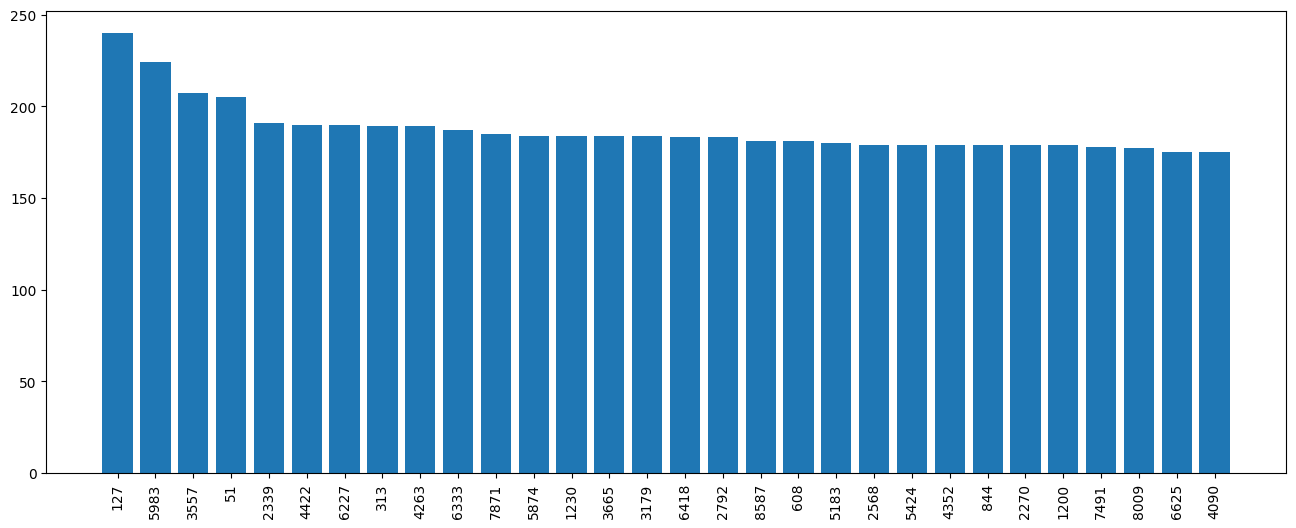

In [5]:
plt.figure(figsize=(16, 6))
count_perspeaker = train_data.groupby('speaker_id').size().sort_values(ascending=False)[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)

In [7]:
speaker_list = [int(i) for i in speaker_list]
print(speaker_list.__len__())
train_data = train_data[train_data.speaker_id.isin(speaker_list)]
print(len(train_data))


30
5620


In [8]:
train_data.iloc[0].file

'/mnt/data-artemis/kshitij/TEMP/ls-cache/downloads/extracted/100a48f9c888715284bd2b0e25d882ffd3198bb1c63b6284d903a2c5e73d2ddc/6227-60173-0000.flac'

In [9]:
## For copying only relevant audio files:

import shutil

output_audio_path = "/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_audio_files/"
for i, example in train_data.iterrows():
    split_loc = example['file'].split("/")
    audio_file_src = "/".join(split_loc[0:-1])+'/LibriSpeech/train-other-500/'+"/".join(split_loc[-1].split('-')[0:2])+'/'+split_loc[-1]
    shutil.copy(audio_file_src,output_audio_path+split_loc[-1])

In [10]:
for i in range(100,111):
    print(train_data.iloc[i]['file'])

/mnt/data-artemis/kshitij/TEMP/ls-cache/downloads/extracted/100a48f9c888715284bd2b0e25d882ffd3198bb1c63b6284d903a2c5e73d2ddc/6227-60173-0100.flac
/mnt/data-artemis/kshitij/TEMP/ls-cache/downloads/extracted/100a48f9c888715284bd2b0e25d882ffd3198bb1c63b6284d903a2c5e73d2ddc/6227-60173-0101.flac
/mnt/data-artemis/kshitij/TEMP/ls-cache/downloads/extracted/100a48f9c888715284bd2b0e25d882ffd3198bb1c63b6284d903a2c5e73d2ddc/6227-60173-0102.flac
/mnt/data-artemis/kshitij/TEMP/ls-cache/downloads/extracted/100a48f9c888715284bd2b0e25d882ffd3198bb1c63b6284d903a2c5e73d2ddc/6227-60173-0103.flac
/mnt/data-artemis/kshitij/TEMP/ls-cache/downloads/extracted/100a48f9c888715284bd2b0e25d882ffd3198bb1c63b6284d903a2c5e73d2ddc/6227-60173-0104.flac
/mnt/data-artemis/kshitij/TEMP/ls-cache/downloads/extracted/100a48f9c888715284bd2b0e25d882ffd3198bb1c63b6284d903a2c5e73d2ddc/6227-60173-0105.flac
/mnt/data-artemis/kshitij/TEMP/ls-cache/downloads/extracted/100a48f9c888715284bd2b0e25d882ffd3198bb1c63b6284d903a2c5e73d2ddc

In [11]:
## Changing the file column to .wav

def change_loc(loc):
    file_name = "useful_audio_wav/"+loc.split("/")[-1].split('.')[0]+'.wav'
    return file_name
train_data.file = train_data.file.map(change_loc)
for i in range(100,111):
    print(train_data.iloc[0]['file'])

useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav
useful_audio_wav/6227-60173-0000.wav


In [12]:
train_data

,file,text,speaker_id
860,useful_audio_wav/6227-60173-0000.wav,BEFORE LEAVING BOSTON I DEVOTED ONE DAY TO AN ...,6227
861,useful_audio_wav/6227-60173-0001.wav,AND AM DESIROUS THAT MY READERS SHOULD DO THE ...,6227
862,useful_audio_wav/6227-60173-0002.wav,AS THESE WORKS ARE PRETTY MUCH ALIKE ALL THROU...,6227
863,useful_audio_wav/6227-60173-0003.wav,THE MAIN DISTINCTION BETWEEN,6227
864,useful_audio_wav/6227-60173-0004.wav,EVERYBODY SMOKES AND IN THE SECOND NOBODY DOES...,6227
...,...,...,...
145029,useful_audio_wav/6625-39674-0023.wav,I HAVE MY PLAN I TELL YOU LEAVE ME TO SET IT I...,6625
145030,useful_audio_wav/6625-39674-0024.wav,FOUQUET LOOKED AGAIN AT GOURVILLE,6625
145031,useful_audio_wav/6625-39674-0025.wav,AND COUNT HIM DOWN THE MONEY ONE MOMENT ABBE O...,6625
145032,useful_audio_wav/6625-39674-0026.wav,I WILL MANAGE THAT SAID THE ABBE YES BUT YOU M...,6625


In [14]:
train_data.to_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/30_class.pkl")

In [15]:
df_loaded = pd.read_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df/30_class.pkl")
df_loaded

,file,text,speaker_id
860,useful_audio_wav/6227-60173-0000.wav,BEFORE LEAVING BOSTON I DEVOTED ONE DAY TO AN ...,6227
861,useful_audio_wav/6227-60173-0001.wav,AND AM DESIROUS THAT MY READERS SHOULD DO THE ...,6227
862,useful_audio_wav/6227-60173-0002.wav,AS THESE WORKS ARE PRETTY MUCH ALIKE ALL THROU...,6227
863,useful_audio_wav/6227-60173-0003.wav,THE MAIN DISTINCTION BETWEEN,6227
864,useful_audio_wav/6227-60173-0004.wav,EVERYBODY SMOKES AND IN THE SECOND NOBODY DOES...,6227
...,...,...,...
145029,useful_audio_wav/6625-39674-0023.wav,I HAVE MY PLAN I TELL YOU LEAVE ME TO SET IT I...,6625
145030,useful_audio_wav/6625-39674-0024.wav,FOUQUET LOOKED AGAIN AT GOURVILLE,6625
145031,useful_audio_wav/6625-39674-0025.wav,AND COUNT HIM DOWN THE MONEY ONE MOMENT ABBE O...,6625
145032,useful_audio_wav/6625-39674-0026.wav,I WILL MANAGE THAT SAID THE ABBE YES BUT YOU M...,6625


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Initialize empty lists to store splits
train_list, dev_list, test_list = [], [], []

# Iterate over each speaker and split their utterances
for speaker, group in df_loaded.groupby("speaker_id"):
    train, temp = train_test_split(group, test_size=0.12, random_state=42)  # 88% train, 12% temp
    dev, test = train_test_split(temp, test_size=0.5, random_state=42)  # 6% dev, 6% test (each 7.5% of total)
    
    train_list.append(train)
    dev_list.append(dev)
    test_list.append(test)

# Concatenate all splits
train_df_loaded = pd.concat(train_list).reset_index(drop=True)
dev_df_loaded = pd.concat(dev_list).reset_index(drop=True)
test_df_loaded = pd.concat(test_list).reset_index(drop=True)

30


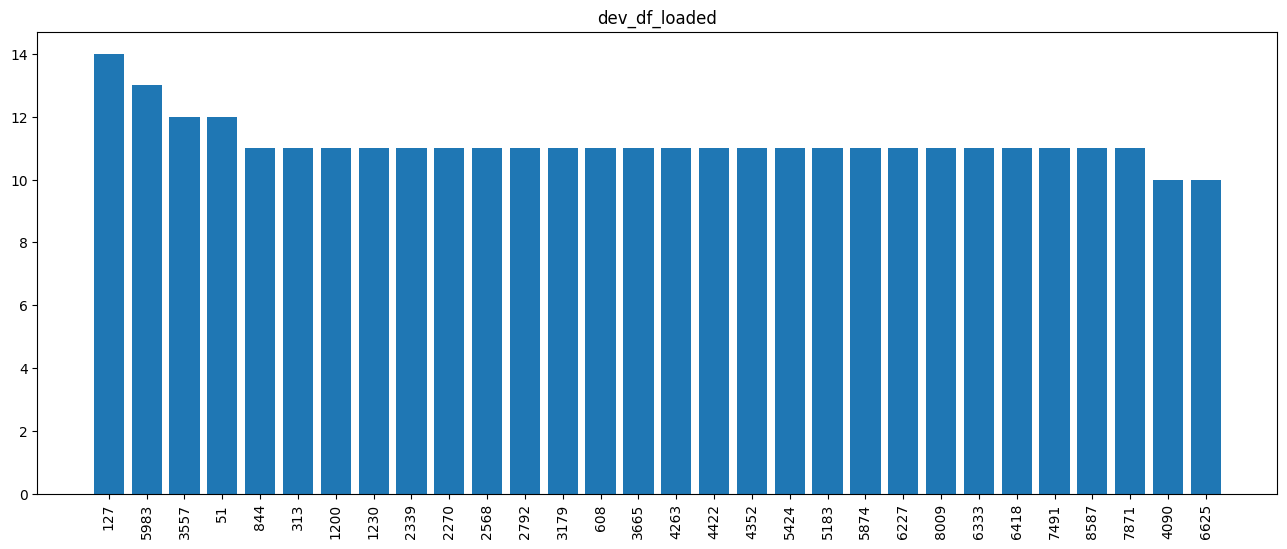

In [17]:
plt.figure(figsize=(16, 6))
count_perspeaker = dev_df_loaded.groupby('speaker_id').size().sort_values(ascending=False)[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)
plt.title("dev_df_loaded")
print(len(speaker_list))

30


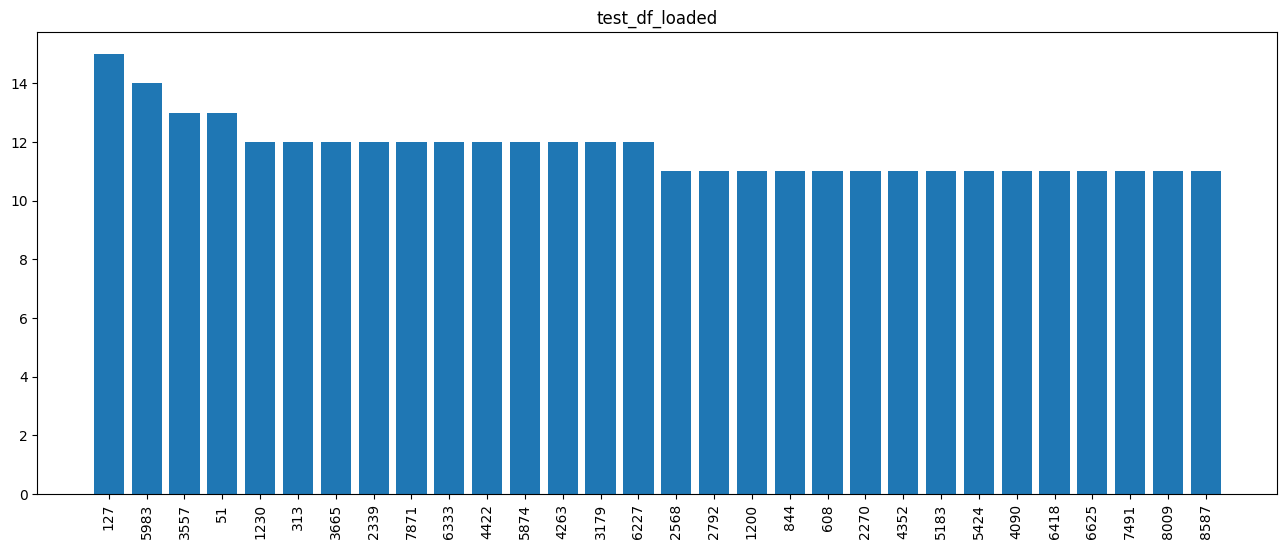

In [18]:
plt.figure(figsize=(16, 6))
count_perspeaker = test_df_loaded.groupby('speaker_id').size().sort_values(ascending=False)[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)
plt.title("test_df_loaded")
print(len(speaker_list))

30


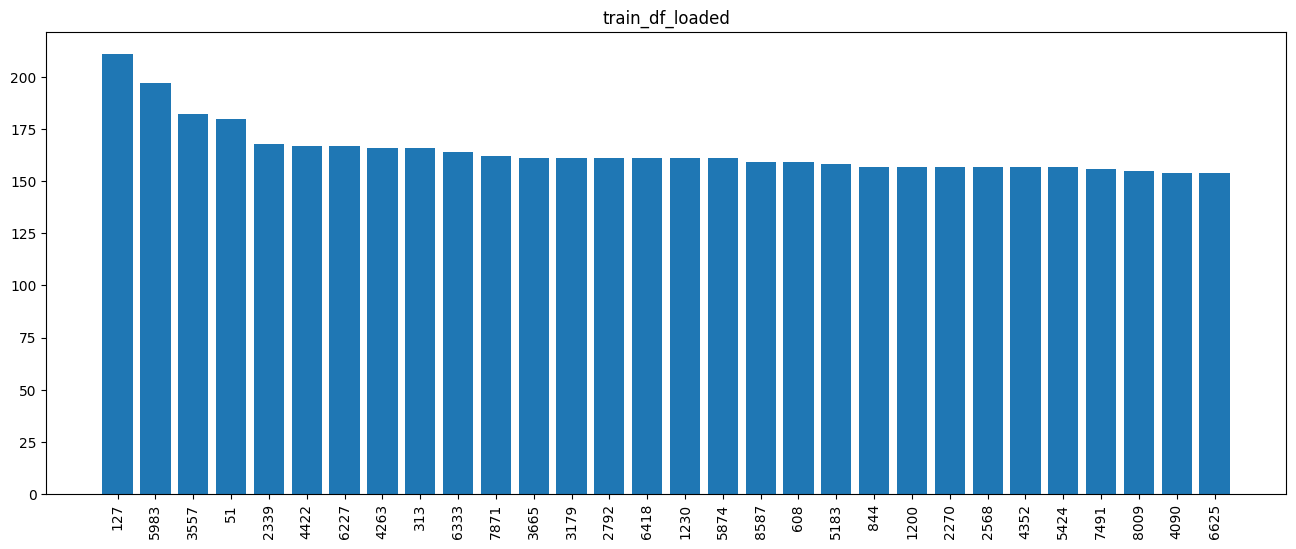

In [19]:
plt.figure(figsize=(16, 6))
count_perspeaker = train_df_loaded.groupby('speaker_id').size().sort_values(ascending=False)[0:30]
speaker_list = [str(i) for i in count_perspeaker.index]
_=plt.bar(x = speaker_list, height = count_perspeaker.values)
_=plt.xticks(rotation=90, fontsize=10)
plt.title("train_df_loaded")
print(len(speaker_list))

In [20]:

# Verify the sizes of each split
print(f"Train set: {len(train_df_loaded)} rows")
print(f"Dev set: {len(dev_df_loaded)} rows")
print(f"Test set: {len(test_df_loaded)} rows")

train_df_loaded.to_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df//30_class_train.pkl")
dev_df_loaded.to_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df//30_class_dev.pkl")
test_df_loaded.to_pickle("/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/useful_df//30_class_test.pkl")

Train set: 4933 rows
Dev set: 335 rows
Test set: 352 rows


In [21]:
print(len(dev_df_loaded))
print(len(test_df_loaded))
print(len(train_df_loaded))

335
352
4933


In [22]:
import os
import shutil
import pandas as pd

# dev_df_loaded = pd.read_csv("your_dataframe.csv")
destination_folder = "/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/dev_wav_files"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over the 'file' column to move each audio file
for index, row in dev_df_loaded.iterrows():
    source_path = "/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/"+row['file']  # Get the audio file path from the dataframe
    if os.path.isfile(source_path):  # Check if the file exists
        dest_path = os.path.join(destination_folder, os.path.basename(source_path))
        shutil.move(source_path, dest_path)
        # print(f"Moved {source_path} to {dest_path}")
    else:
        print(f"File not found: {source_path}")


In [23]:
# test_df_loaded = pd.read_csv("your_dataframe.csv")
destination_folder = "/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/test_wav_files"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over the 'file' column to move each audio file
for index, row in test_df_loaded.iterrows():
    source_path = "/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/"+row['file']  # Get the audio file path from the dataframe
    if os.path.isfile(source_path):  # Check if the file exists
        dest_path = os.path.join(destination_folder, os.path.basename(source_path))
        shutil.move(source_path, dest_path)
        # print(f"Moved {source_path} to {dest_path}")
    else:
        print(f"File not found: {source_path}")


In [24]:
# train_df_loaded = pd.read_csv("your_dataframe.csv")
destination_folder = "/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/train_wav_files"

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Iterate over the 'file' column to move each audio file
for index, row in train_df_loaded.iterrows():
    source_path = "/mnt/data-artemis/kshitij/TEMP/Speaker-recognition/"+row['file']  # Get the audio file path from the dataframe
    if os.path.isfile(source_path):  # Check if the file exists
        dest_path = os.path.join(destination_folder, os.path.basename(source_path))
        shutil.move(source_path, dest_path)
        # print(f"Moved {source_path} to {dest_path}")
    else:
        print(f"File not found: {source_path}")
